<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/CoFeB_Ferromagnetic_Resonance_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resonance Field at 300 K: 629.7 Oe
Resonance Field at 10 K: 562.4 Oe


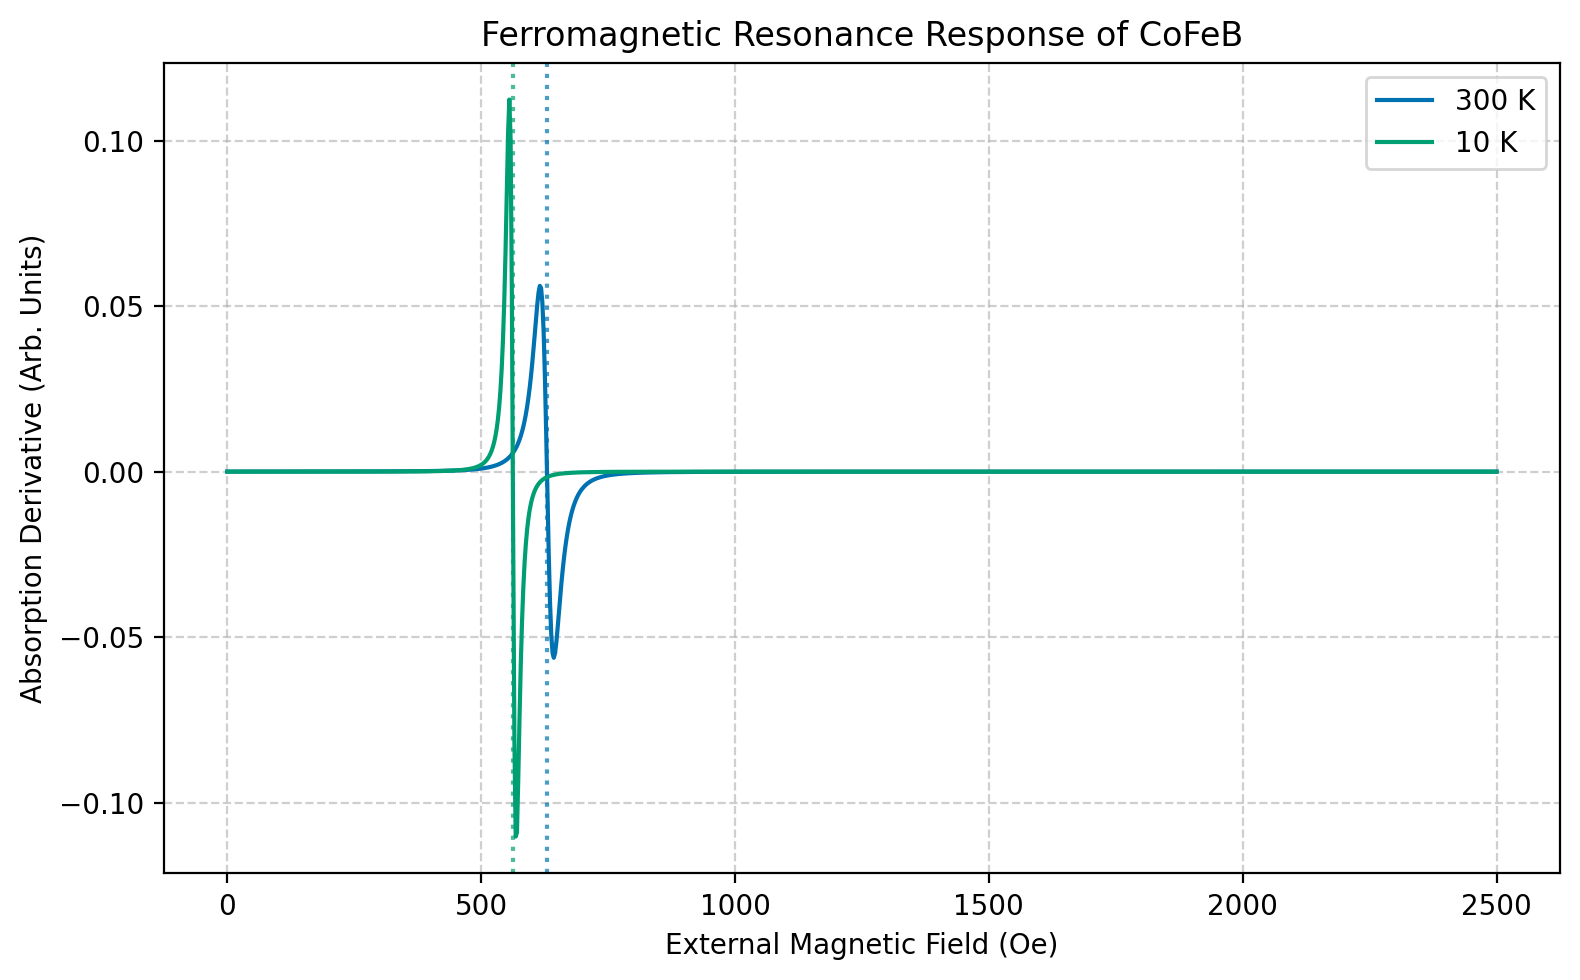

In [1]:
"""
Generates a plot for the ferromagnetic resonance (FMR) response of CoFeB.

This script calculates and plots the derivative of the absorption signal for
a CoFeB thin film at two different temperatures: 300 K (room temperature)
and 10 K. The resonance field is determined using the in-plane Kittel
formula, and the FMR signal is modeled as the derivative of a Lorentzian
lineshape.

All physical parameters are defined up front in the "CONTROL KNOBS" section
for easy modification.
"""

import numpy as np
import matplotlib.pyplot as plt

# --- CONTROL KNOBS ---
# Adjust the physical parameters of the system here.

# --- Global Settings ---
MICROWAVE_FREQUENCY_GHZ = 9.5  # Common X-band ESR/FMR frequency.

# --- Parameters at 300 K (Room Temperature) ---
# Effective magnetization (4*pi*M_eff) in Oersted. Decreases with temp.
M_EFF_300K_OE = 15000.0
# In-plane uniaxial anisotropy field in Oersted.
H_K_300K_OE = 50.0
# Peak-to-peak linewidth of the derivative signal in Oersted. Increases with temp.
D_H_PP_300K_OE = 40.0

# --- Parameters at 10 K (Low Temperature) ---
# Effective magnetization increases at low temperatures.
M_EFF_10K_OE = 16500.0
# Anisotropy can also change with temperature.
H_K_10K_OE = 60.0
# Linewidth typically decreases at low temperatures due to reduced damping.
D_H_PP_10K_OE = 20.0

# --- Plotting & Simulation Settings ---
FIELD_START_OE = 0  # Starting value for the external magnetic field sweep.
FIELD_END_OE = 2500  # Ending value for the field sweep.
NUM_POINTS = 1000  # Number of points in the simulation.


# --- PHYSICAL CONSTANTS ---
# Gyromagnetic ratio in GHz/kOe. (g-factor is ~2.08 for CoFeB)
GAMMA_PRIME_GHZ_KOE = 2.91


def calculate_resonance_field(freq_ghz, m_eff_oe, h_k_oe):
    """
    Calculate the resonance field using the in-plane Kittel formula.

    The Kittel formula for a thin film with the field in-plane is:
    (f/gamma')^2 = (H_res + H_k) * (H_res + H_k + 4*pi*M_eff)

    This function solves the resulting quadratic equation for H_res.

    Args:
        freq_ghz (float): The microwave frequency in GHz.
        m_eff_oe (float): The effective magnetization (4*pi*M_eff) in Oe.
        h_k_oe (float): The uniaxial anisotropy field in Oe.

    Returns:
        float: The resonance field (H_res) in Oersted.
    """
    gamma_prime_ghz_oe = GAMMA_PRIME_GHZ_KOE / 1000.0
    a = 1.0
    b = m_eff_oe + 2 * h_k_oe
    c = h_k_oe**2 + h_k_oe * m_eff_oe - (freq_ghz / gamma_prime_ghz_oe)**2

    # Solve quadratic equation: a*x^2 + b*x + c = 0, where x = H_res
    h_res = (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)
    return h_res


def lorentzian_derivative(h_field, h_res, dh_pp):
    """
    Calculate the derivative of a Lorentzian function.

    This lineshape is characteristic of FMR absorption signals measured
    using lock-in detection techniques.

    Args:
        h_field (np.ndarray): Array of external magnetic field values in Oe.
        h_res (float): The resonance field in Oe.
        dh_pp (float): The peak-to-peak linewidth in Oe.

    Returns:
        np.ndarray: The derivative of the absorption signal (arbitrary units).
    """
    # The relationship between HWHM (ΔH) and dH_pp is ΔH = dH_pp / sqrt(3)
    delta_h = dh_pp / np.sqrt(3)
    numerator = -4 * (h_field - h_res) * delta_h**2
    denominator = ((h_field - h_res)**2 + delta_h**2)**2
    return numerator / denominator


def main():
    """Main function to perform calculations and generate the plot."""
    # --- CALCULATIONS ---
    h_res_300k = calculate_resonance_field(
        MICROWAVE_FREQUENCY_GHZ, M_EFF_300K_OE, H_K_300K_OE
    )
    h_res_10k = calculate_resonance_field(
        MICROWAVE_FREQUENCY_GHZ, M_EFF_10K_OE, H_K_10K_OE
    )

    # Generate the magnetic field sweep
    h_field_sweep = np.linspace(FIELD_START_OE, FIELD_END_OE, NUM_POINTS)

    # Calculate the FMR derivative signals
    fmr_signal_300k = lorentzian_derivative(
        h_field_sweep, h_res_300k, D_H_PP_300K_OE
    )
    fmr_signal_10k = lorentzian_derivative(
        h_field_sweep, h_res_10k, D_H_PP_10K_OE
    )

    # --- PLOTTING ---
    plt.style.use('seaborn-v0_8-colorblind')
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['figure.figsize'] = (8, 5)

    fig, ax = plt.subplots()

    ax.plot(h_field_sweep, fmr_signal_300k, label='300 K')
    ax.plot(h_field_sweep, fmr_signal_10k, label='10 K')

    # --- FORMATTING ---
    ax.set_title('Ferromagnetic Resonance Response of CoFeB')
    ax.set_xlabel('External Magnetic Field (Oe)')
    ax.set_ylabel('Absorption Derivative (Arb. Units)')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add text annotations for resonance fields
    ax.axvline(h_res_300k, color='C0', linestyle=':', alpha=0.7)
    ax.axvline(h_res_10k, color='C1', linestyle=':', alpha=0.7)
    print(f"Resonance Field at 300 K: {h_res_300k:.1f} Oe")
    print(f"Resonance Field at 10 K: {h_res_10k:.1f} Oe")

    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()